## **Upload & Load the Dataset**

Before starting any data analysis or preprocessing, the first step is to load the dataset into a pandas DataFrame.
This allows us to view, explore, and work with the data easily in Python.

In [ ]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
file_path = "nanotox_dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows to verify that the dataset has loaded correctly
df.head()


,NPs,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen,class
0,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.001,1.61,3,nonToxic
1,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.010,1.61,3,nonToxic
2,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,0.100,1.61,3,nonToxic
3,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,1.000,1.61,3,nonToxic
4,Al2O3,39.7,267.0,36.3,64.7,-1.51,24,5.000,1.61,3,nonToxic


## **Check Columns and Data Types**

After loading the dataset, the next step is to inspect the structure of the DataFrame — including column names, data types, and non-null counts.
This helps us understand what kind of data we’re working with and if there are any issues.

In [ ]:
# Display basic information about the dataset
df.info()

# Print just the column names separately
print("\n Column Names:", df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NPs         881 non-null    object 
 1   coresize    881 non-null    float64
 2   hydrosize   881 non-null    float64
 3   surfcharge  881 non-null    float64
 4   surfarea    881 non-null    float64
 5   Ec          881 non-null    float64
 6   Expotime    881 non-null    int64  
 7   dosage      881 non-null    float64
 8   e           881 non-null    float64
 9   NOxygen     881 non-null    int64  
 10  class       881 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 75.8+ KB

 Column Names: ['NPs', 'coresize', 'hydrosize', 'surfcharge', 'surfarea', 'Ec', 'Expotime', 'dosage', 'e', 'NOxygen', 'class']


## **Get Basic Statistical Summary**

Now that we know the columns and their types, the next step is to examine the statistical properties of the numeric features.
This gives us insights into the range, central tendency, and spread of the data.

In [ ]:
# Get basic statistics for numerical columns
df.describe()

,coresize,hydrosize,surfcharge,surfarea,Ec,Expotime,dosage,e,NOxygen
count,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,56.313280,513.781385,1.642111,42.074075,-4.018127,27.459705,39.651270,1.646050,1.308740
std,33.700297,346.601373,25.635780,47.111739,0.509806,19.534667,38.163289,0.089304,0.543581
min,7.500000,74.000000,-41.600000,7.000000,-5.170000,3.000000,0.000010,1.540000,1.000000
25%,32.000000,273.400000,-11.700000,15.000000,-4.160000,12.000000,10.000000,1.650000,1.000000
50%,45.300000,327.000000,-9.300000,24.100000,-3.890000,24.000000,25.000000,1.650000,1.000000
75%,86.000000,687.000000,29.400000,42.500000,-3.890000,24.000000,50.000000,1.650000,2.000000
max,125.000000,1843.000000,42.800000,210.000000,-1.510000,72.000000,300.000000,1.900000,3.000000


## **Check for Missing Values**

Before moving to preprocessing, it’s important to check if any columns contain missing or null values.
Missing data can affect training, so we’ll either need to fill or remove them later.

In [ ]:
# Check how many missing values each column has
df.isnull().sum()

,0
NPs,0
coresize,0
hydrosize,0
surfcharge,0
surfarea,0
Ec,0
Expotime,0
dosage,0
e,0
NOxygen,0


## **Visualize Feature Distributions**

Now that we know the data is clean, let’s visualize the distribution of all numeric features.
This helps us understand how each feature is spread — whether the data is uniform, skewed, or has outliers.

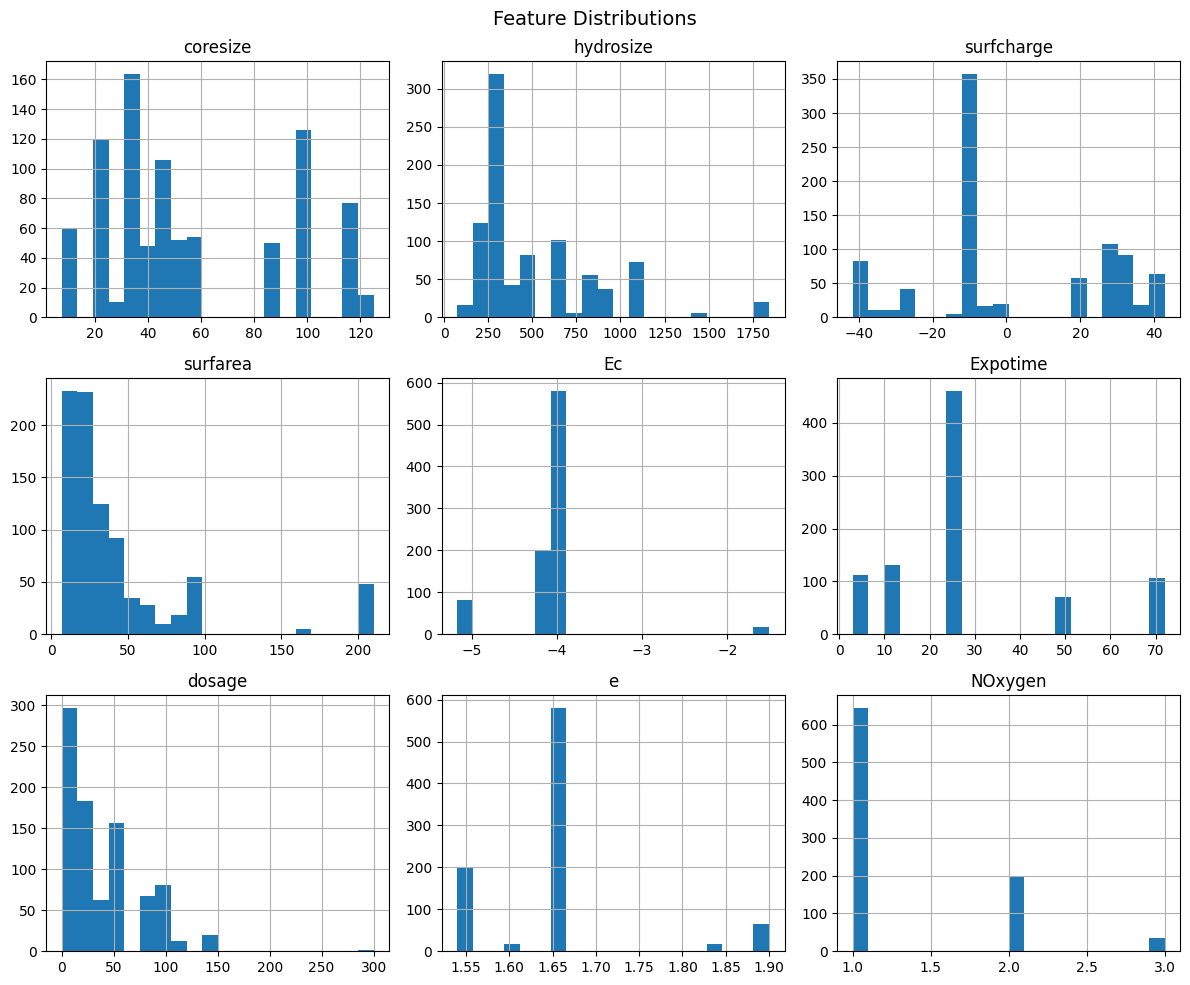

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram for all numeric columns
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=14)
plt.tight_layout()
plt.show()


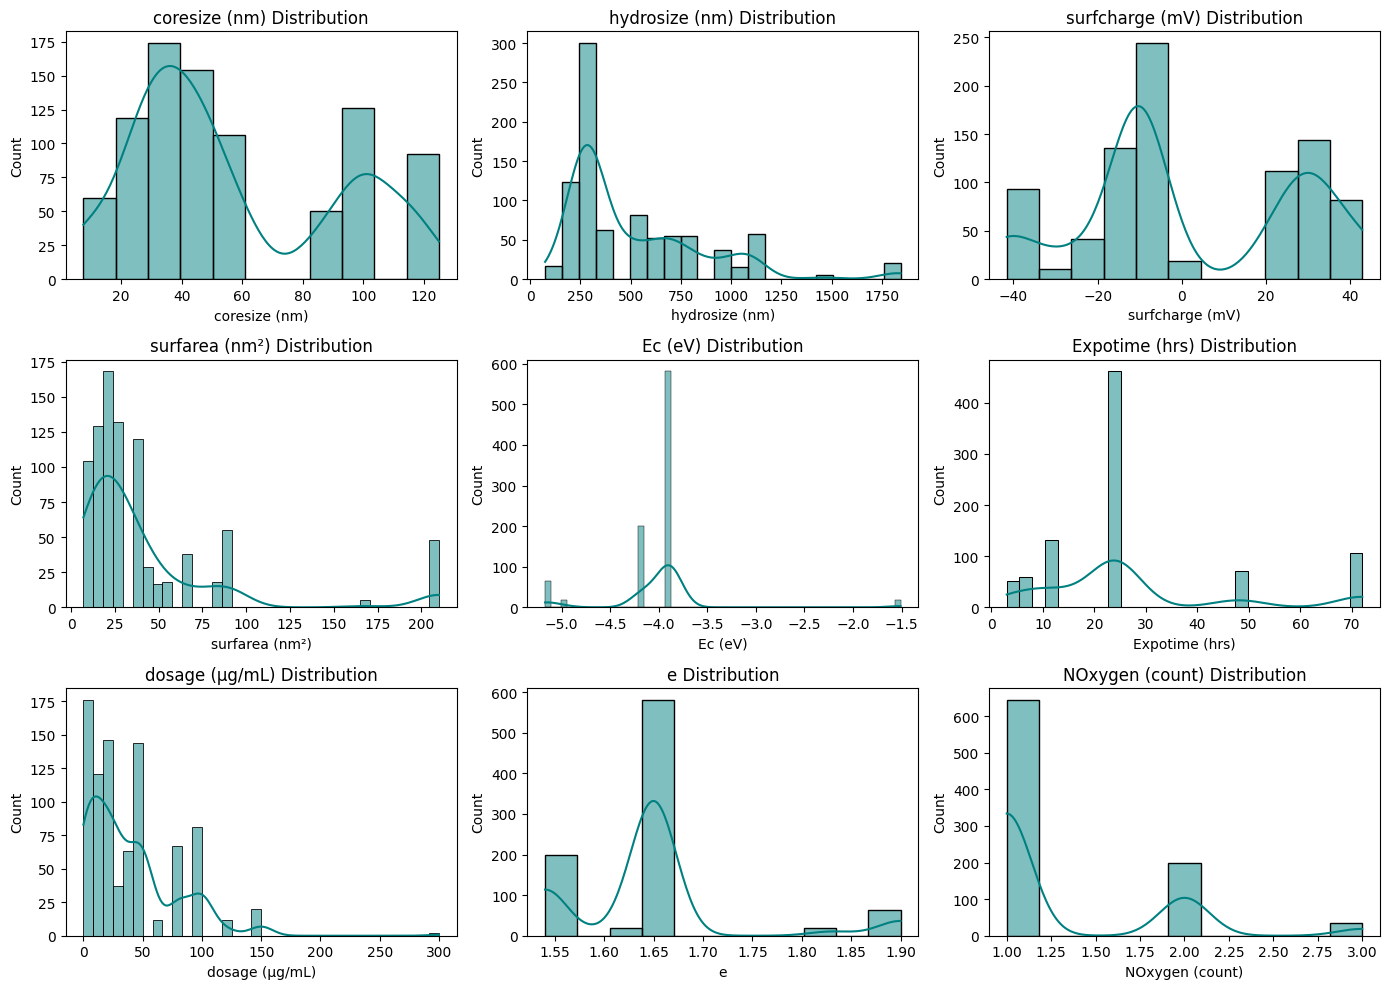

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# features = ['coresize', 'hydrosize', 'surfcharge', 'surfarea', 'Ec', 'Expotime', 'dosage', 'e', 'NOxygen']

# plt.figure(figsize=(14, 10))
# for i, col in enumerate(features, 1):
#     plt.subplot(3, 3, i)
#     sns.histplot(df[col], kde=True, color='teal')
#     plt.title(f'{col} Distribution')
# plt.tight_layout()
# plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Your feature list
features = ['coresize', 'hydrosize', 'surfcharge', 'surfarea', 'Ec', 'Expotime', 'dosage', 'e', 'NOxygen']

# Units for each feature
feature_units = {
    'coresize': 'nm',
    'hydrosize': 'nm',
    'surfcharge': 'mV',
    'surfarea': 'nm²',
    'Ec': 'eV',
    'Expotime': 'hrs',
    'dosage': 'µg/mL',
    'NOxygen': 'count'
}

plt.figure(figsize=(14, 10))

for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color='teal')

    # Build label with unit
    unit = feature_units.get(col, "")
    label = f"{col} ({unit})" if unit else col

    # Apply to xlabel and title
    plt.xlabel(label)
    plt.title(f"{label} Distribution")

plt.tight_layout()
plt.show()

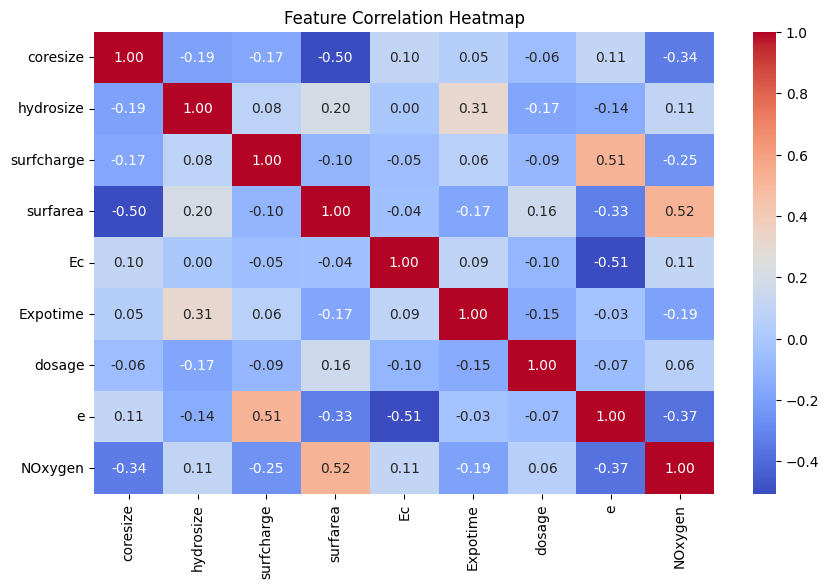

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


/tmp/ipython-input-2925263057.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=df, palette='Set2')
/tmp/ipython-input-2925263057.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=df, palette='Set2')
/tmp/ipython-input-2925263057.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=col, data=df, palette='Set2')
/tmp/ipython-input-2925263057.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue

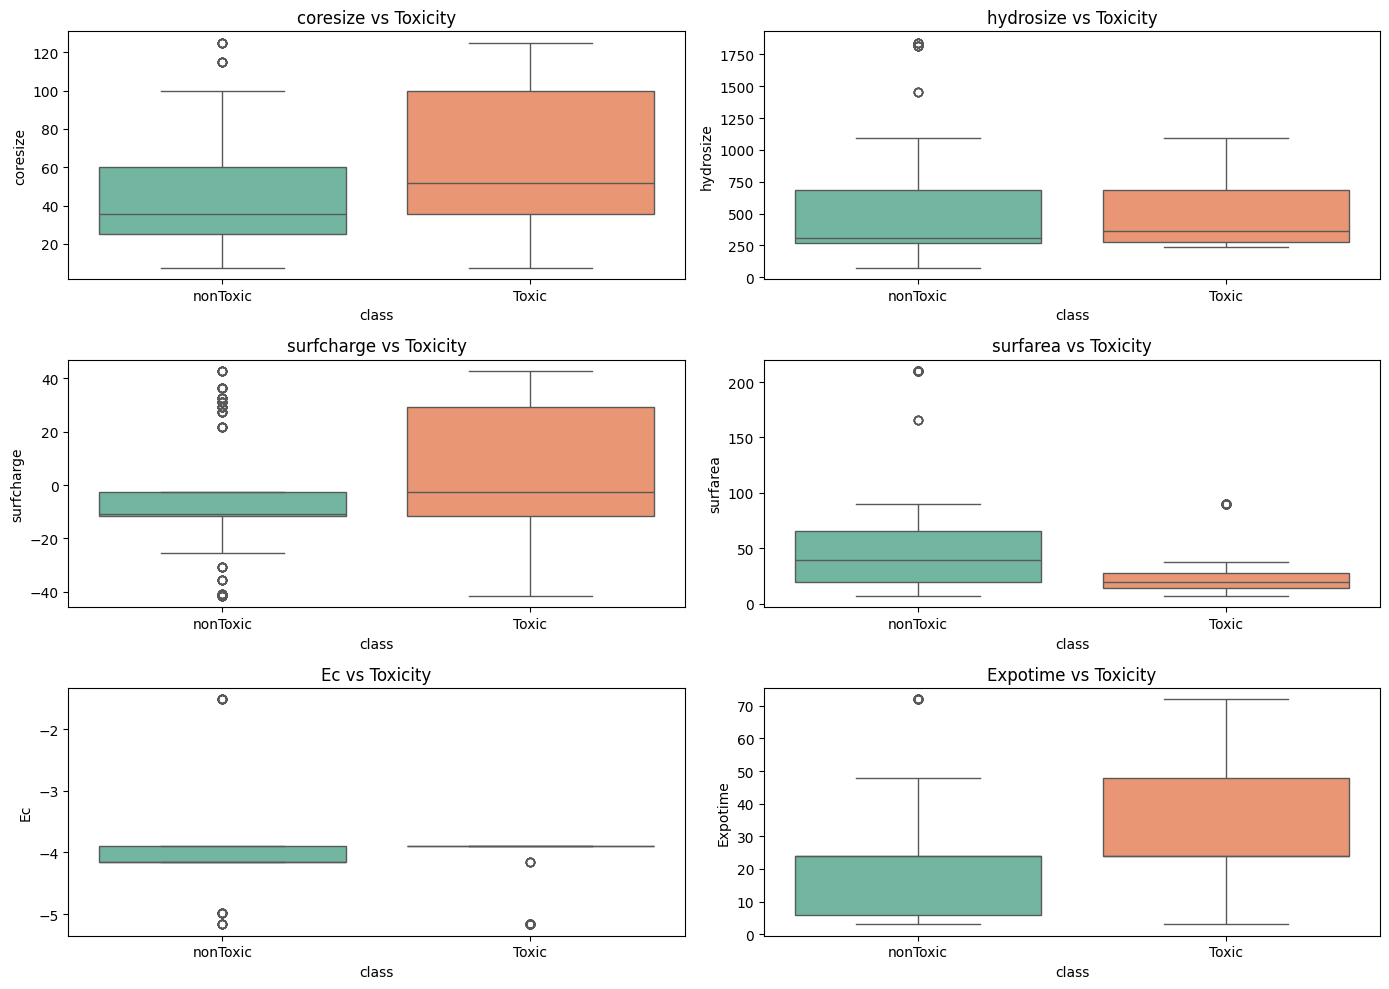

In [ ]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(features[:6], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='class', y=col, data=df, palette='Set2')
    plt.title(f'{col} vs Toxicity')
plt.tight_layout()
plt.show()


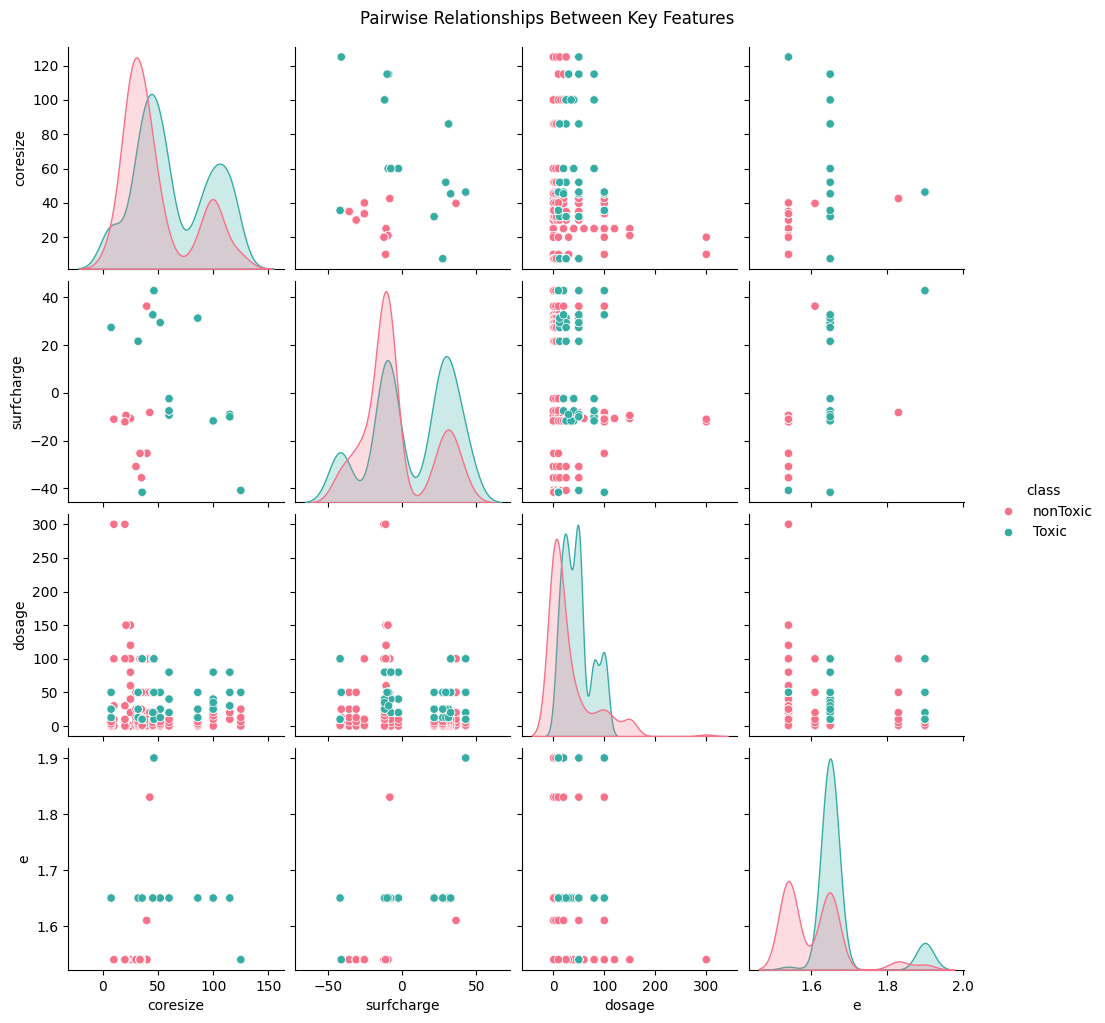

In [ ]:
sns.pairplot(df, vars=['coresize', 'surfcharge', 'dosage', 'e'], hue='class', palette='husl')
plt.suptitle("Pairwise Relationships Between Key Features", y=1.02)
plt.show()


## **Check Class Balance in the Target Column**

Since your dataset already has a Toxicity column, the next step is to see how many samples belong to each class (Toxic vs Non-toxic).
This helps us understand if we need to balance the dataset during training.

In [ ]:
# Count how many samples are Toxic vs Non-toxic
df['class'].value_counts()

,count
class,
Toxic,476
nonToxic,405


## **Select Only the Useful Features for Training**

The dataset contains several metadata and method columns that are not needed for deep learning training.
We’ll keep only the core numeric features relevant for toxicity prediction and the target column.

In [ ]:
# Select only the relevant numeric features and target column
selected_columns = [
    'coresize',
    'hydrosize',
    'surfcharge',
    'e',
    'dosage',
    'class'
]

df_model = df[selected_columns].copy()

# Display the first few rows of the cleaned dataset
df_model.head()

,coresize,hydrosize,surfcharge,e,dosage,class
0,39.7,267.0,36.3,1.61,0.001,nonToxic
1,39.7,267.0,36.3,1.61,0.010,nonToxic
2,39.7,267.0,36.3,1.61,0.100,nonToxic
3,39.7,267.0,36.3,1.61,1.000,nonToxic
4,39.7,267.0,36.3,1.61,5.000,nonToxic


## **Encode Target Column and Separate Features & Labels**

Our Toxicity column currently has string values: "Nontoxic" and "Toxic".
We need to convert them to numeric labels —

0 → Nontoxic

1 → Toxic

Then we’ll separate the feature matrix X and the target vector y for training.

In [ ]:
# Encode target labels: Nontoxic -> 0, Toxic -> 1
df_model['class'] = df_model['class'].map({'nonToxic': 0, 'Toxic': 1})

# Separate features (X) and target (y)
X = df_model.drop(columns=['class'])
y = df_model['class']

# Check shapes
print("Feature shape (X):", X.shape)
print("Target shape (y):", y.shape)

# Display first few rows to verify encoding
df_model.head()


Feature shape (X): (881, 5)
Target shape (y): (881,)


,coresize,hydrosize,surfcharge,e,dosage,class
0,39.7,267.0,36.3,1.61,0.001,0
1,39.7,267.0,36.3,1.61,0.010,0
2,39.7,267.0,36.3,1.61,0.100,0
3,39.7,267.0,36.3,1.61,1.000,0
4,39.7,267.0,36.3,1.61,5.000,0


## **Feature Scaling (Standardization)**

Our features — like Core size, Hydro size, Surface charge, etc. — have different numeric ranges.
Deep learning models work best when features are on a similar scale.
We’ll use StandardScaler to standardize each feature

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the feature matrix
X_scaled = scaler.fit_transform(X)

# Convert back to a DataFrame for clarity (optional)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Preview scaled features
X_scaled.head()


,coresize,hydrosize,surfcharge,e,dosage
0,-0.493251,-0.712408,1.352702,-0.403904,-1.039554
1,-0.493251,-0.712408,1.352702,-0.403904,-1.039318
2,-0.493251,-0.712408,1.352702,-0.403904,-1.036958
3,-0.493251,-0.712408,1.352702,-0.403904,-1.013362
4,-0.493251,-0.712408,1.352702,-0.403904,-0.908490


## **Prepare Final Tensors for Deep Learning Model**

Most deep learning frameworks (like TensorFlow/Keras or PyTorch) prefer NumPy arrays for input.
We’ll convert our scaled features (X_scaled) and labels (y) to NumPy arrays.

In [ ]:
import numpy as np

# Convert features and target to NumPy arrays
X_final = X_scaled.values
y_final = y.values

# Check the final shapes
print(" Final feature shape:", X_final.shape)
print(" Final target shape:", y_final.shape)


 Final feature shape: (881, 5)
 Final target shape: (881,)


## **Define the Deep Learning Model Architecture**

We’ll build a simple but effective feed-forward neural network (Multi-Layer Perceptron) using Keras (TensorFlow).

This model will learn to classify toxic vs non-toxic based on the 5 physicochemical properties.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_final.shape[1],)),  # Input layer + first hidden layer
    Dropout(0.2),                                                   # Prevent overfitting
    Dense(32, activation='relu'),                                   # Second hidden layer
    Dense(1, activation='sigmoid')                                  # Output layer for binary classification
])

# Display model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

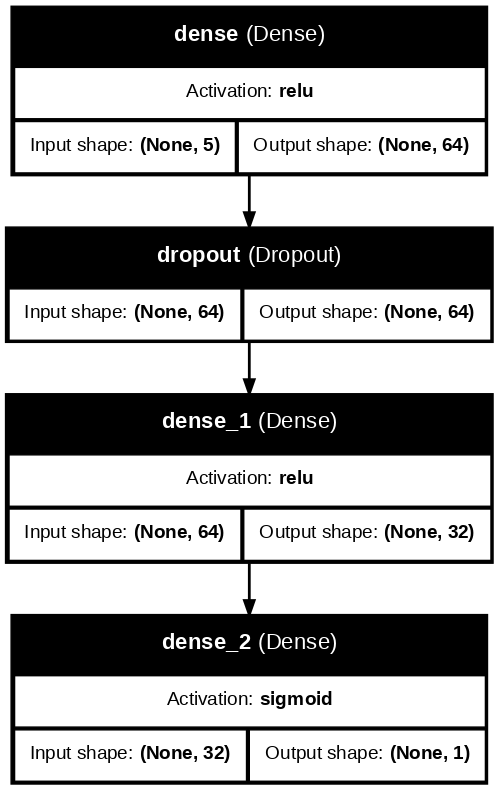

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Create the flowchart and save it as an image file
plot_model(
    model,
    to_file='model_architecture.png',
    show_shapes=True,      # Displays the input/output dimensions (Very useful)
    show_layer_names=True, # Displays the name of each layer
    show_layer_activations=True, # Displays activation functions (e.g., relu, sigmoid)
    rankdir='TB',          # 'TB' for Top-to-Bottom flow, 'LR' for Left-to-Right
    dpi=100                # Resolution of the image
)

# Display the image in the notebook
Image(filename='model_architecture.png')

## **Compile the Model**

Now we’ll compile the neural network by specifying:

Optimizer → how the model updates weights

Loss function → how error is calculated

Metrics → how we evaluate performance during training

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),       # Adaptive optimizer with default learning rate
    loss='binary_crossentropy',                # Suitable for binary classification
    metrics=['accuracy']                       # Track accuracy during training
)


## **Train the Model**
We’ll now train the model using the entire dataset while keeping aside a small portion for validation using validation_split.
This helps us monitor how well the model generalizes during training.

In [ ]:
# Train the model
history = model.fit(
    X_final,
    y_final,
    epochs=100,                 # number of passes through the data
    batch_size=32,              # number of samples processed before updating weights
    validation_split=0.2,       # 20% data used for validation
    verbose=1
)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.5730 - loss: 0.6603 - val_accuracy: 0.2260 - val_loss: 0.7809
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6640 - loss: 0.5792 - val_accuracy: 0.4407 - val_loss: 0.7096
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7324 - loss: 0.5437 - val_accuracy: 0.6102 - val_loss: 0.6656
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8079 - loss: 0.4750 - val_accuracy: 0.6949 - val_loss: 0.5980
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8031 - loss: 0.4411 - val_accuracy: 0.7684 - val_loss: 0.5499
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8367 - loss: 0.4097 - val_accuracy: 0.8249 - val_loss: 0.4900
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8281 - loss: 0.3798 - val_accuracy: 0.8023 - val_loss: 0.4541
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8544 - loss: 0.3533 - val_accuracy: 0.8249 - 

## **Visualize Training Performance**

After training, it’s important to visualize how the model’s accuracy and loss evolved during training and validation.
This helps us understand if the model is learning well or overfitting.

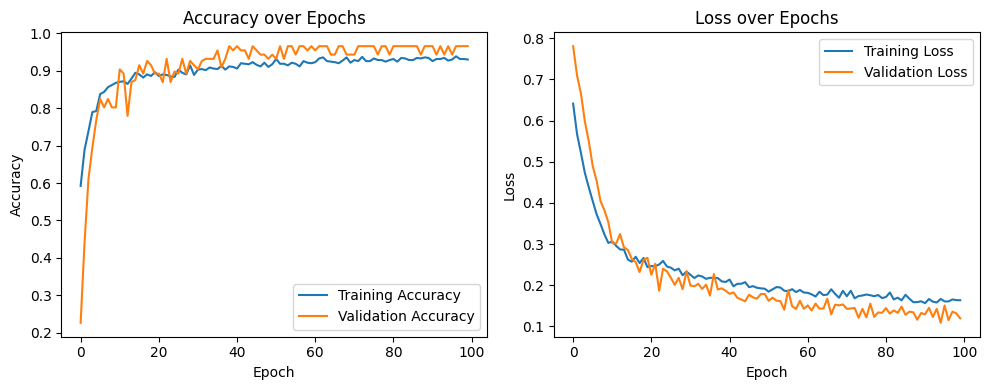

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(10,4))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## **Evaluate Model Performance**

Now we’ll evaluate how well the trained model performs on the entire dataset (since we didn’t do a separate train-test split).
We’ll check overall accuracy and generate predictions for deeper analysis.

In [ ]:
# Evaluate the model on the entire dataset
loss, accuracy = model.evaluate(X_final, y_final, verbose=0)
print(f" Model Accuracy: {accuracy*100:.2f}%")
print(f" Model Loss: {loss:.4f}")

# Generate predictions (probabilities)
y_pred_prob = model.predict(X_final)

# Convert probabilities to binary labels (0 or 1)
y_pred = (y_pred_prob >= 0.5).astype(int).reshape(-1)


 Model Accuracy: 94.55%
 Model Loss: 0.1388
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


## **Save the Trained Model**

We’ll save the model in TensorFlow’s native .h5 format — easy to reload and use later for predictions.

In [ ]:
# Save the trained model
model.save("nanoparticle_toxicity_model.h5")
print(" Model saved successfully as 'Base_model.h5'")


 Model saved successfully as 'Base_model.h5'


# Testing Dataset

In [ ]:
import pandas as pd

test_df = pd.read_csv("test_data.csv")
test_df.head()


,Core Size,Hyrdo Size (nm),?-potential in H2O,Electronegativity,Concentration,Expotime,Viability,Toxicity
0,14.7,429.5,22.95,1.61,0.0,24.0,100.00,NonToxic
1,14.7,429.5,22.95,1.61,3.1,24.0,104.08,NonToxic
2,14.7,429.5,22.95,1.61,6.2,24.0,100.03,NonToxic
3,14.7,429.5,22.95,1.61,12.5,24.0,99.96,NonToxic
4,14.7,429.5,22.95,1.61,25.0,24.0,102.78,NonToxic


In [ ]:
print(" Missing values in each column:\n", test_df.isnull().sum())

 Missing values in each column:
 Core Size             3
Hyrdo Size (nm)       3
?-potential in H2O    3
Electronegativity     3
Concentration         3
Expotime              3
Viability             3
Toxicity              3
dtype: int64


In [ ]:
test_df = test_df.dropna()

In [ ]:
print("\n After cleaning, missing values:\n", test_df.isnull().sum())


 After cleaning, missing values:
 Core Size             0
Hyrdo Size (nm)       0
?-potential in H2O    0
Electronegativity     0
Concentration         0
Expotime              0
Viability             0
Toxicity              0
dtype: int64


In [ ]:
test_df.columns = test_df.columns.str.strip()

In [ ]:
test_df['Toxicity_Label_Num'] = test_df['Toxicity'].map({'NonToxic': 0, 'Toxic': 1})

# Fill NaN values (e.g., with -1 or a value outside your label range) before converting to int
test_df['Toxicity_Label_Num'] = test_df['Toxicity_Label_Num'].fillna(-1).astype(int)

In [ ]:
test_df.head()

,Core Size,Hyrdo Size (nm),?-potential in H2O,Electronegativity,Concentration,Expotime,Viability,Toxicity,Toxicity_Label_Num
0,14.7,429.5,22.95,1.61,0.0,24.0,100.00,NonToxic,0
1,14.7,429.5,22.95,1.61,3.1,24.0,104.08,NonToxic,0
2,14.7,429.5,22.95,1.61,6.2,24.0,100.03,NonToxic,0
3,14.7,429.5,22.95,1.61,12.5,24.0,99.96,NonToxic,0
4,14.7,429.5,22.95,1.61,25.0,24.0,102.78,NonToxic,0


In [ ]:
# Print column names and their index position for clarity
for i, col in enumerate(test_df.columns):
    print(f"{i}: {col}")


0: Core Size
1: Hyrdo Size (nm)
2: ?-potential in H2O
3: Electronegativity
4: Concentration
5: Expotime
6: Viability
7: Toxicity
8: Toxicity_Label_Num


In [ ]:
# Rename columns to match training features
test_df = test_df.rename(columns={
    'Core Size': 'coresize',
    'Hyrdo Size (nm)': 'hydrosize',
    '?-potential in H2O': 'surfcharge',
    'Electronegativity': 'e',
    'Concentration': 'dosage'
})

# Verify the new column names
print(" Updated column names:")
print(test_df.columns.tolist())

 Updated column names:
['coresize', 'hydrosize', 'surfcharge', 'e', 'dosage', 'Expotime', 'Viability', 'Toxicity', 'Toxicity_Label_Num']


In [ ]:
test_df.head()

,coresize,hydrosize,surfcharge,e,dosage,Expotime,Viability,Toxicity,Toxicity_Label_Num
0,14.7,429.5,22.95,1.61,0.0,24.0,100.00,NonToxic,0
1,14.7,429.5,22.95,1.61,3.1,24.0,104.08,NonToxic,0
2,14.7,429.5,22.95,1.61,6.2,24.0,100.03,NonToxic,0
3,14.7,429.5,22.95,1.61,12.5,24.0,99.96,NonToxic,0
4,14.7,429.5,22.95,1.61,25.0,24.0,102.78,NonToxic,0


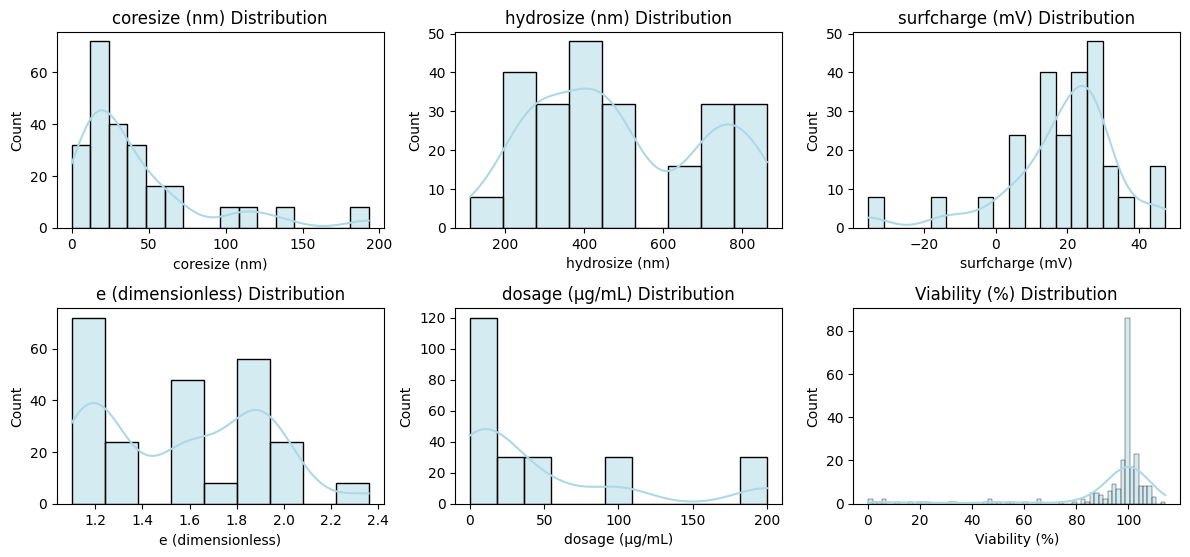

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# numeric_cols = ['coresize', 'hydrosize', 'surfcharge',
#                 'e', 'dosage', 'Viability']

# plt.figure(figsize=(12, 8))
# for i, col in enumerate(numeric_cols, 1):
#     plt.subplot(3, 3, i)
#     sns.histplot(test_df[col], kde=True, color='lightblue')
#     plt.title(f'{col} Distribution')
# plt.tight_layout()
# plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['coresize', 'hydrosize', 'surfcharge',
                'e', 'dosage', 'Viability']

# Units for each numeric column
feature_units = {
    'coresize': 'nm',
    'hydrosize': 'nm',
    'surfcharge': 'mV',
    'e': 'dimensionless',
    'dosage': 'µg/mL',
    'Viability': '%'
}

plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(test_df[col], kde=True, color='lightblue')

    # Add units
    unit = feature_units.get(col, "")
    label = f"{col} ({unit})" if unit else col

    plt.xlabel(label)
    plt.title(f"{label} Distribution")

plt.tight_layout()
plt.show()

/tmp/ipython-input-1768039279.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Toxicity', y=col, data=test_df, palette='coolwarm')
/tmp/ipython-input-1768039279.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Toxicity', y=col, data=test_df, palette='coolwarm')
/tmp/ipython-input-1768039279.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Toxicity', y=col, data=test_df, palette='coolwarm')
/tmp/ipython-input-1768039279.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

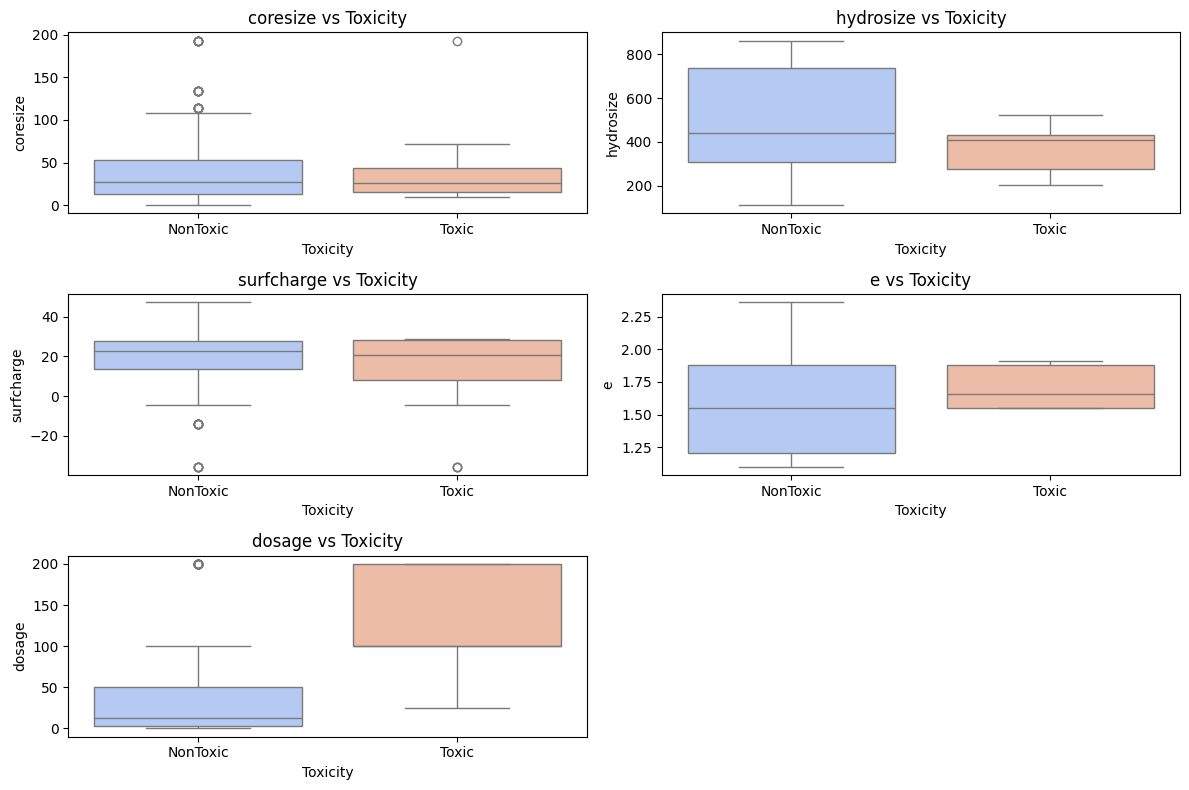

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols[:-1], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Toxicity', y=col, data=test_df, palette='coolwarm')
    plt.title(f'{col} vs Toxicity')
plt.tight_layout()
plt.show()


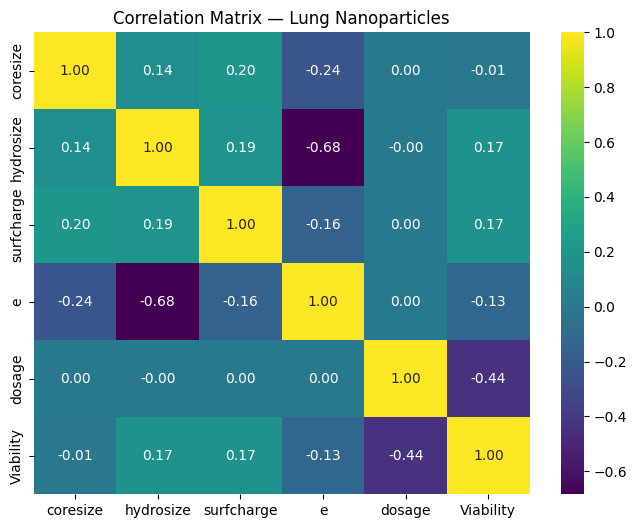

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a filtered version of your DataFrame without unwanted columns
corr_df = test_df.drop(columns=['Expotime', 'Toxicity_Label_Num'], errors='ignore')

# Generate and visualize the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_df.corr(numeric_only=True), annot=True, cmap='viridis', fmt='.2f')
plt.title("Correlation Matrix — Lung Nanoparticles")
plt.show()


In [ ]:
# Select the same 5 features used during training
X_test = test_df[['coresize',
                  'hydrosize',
                  'surfcharge',
                  'e',
                  'dosage']]

# Apply the previously fitted scaler
X_test_scaled = scaler.transform(X_test)

print(" Feature scaling applied successfully.")
print(" Shape of scaled test data:", X_test_scaled.shape)


 Feature scaling applied successfully.
 Shape of scaled test data: (240, 5)


In [ ]:
X_test_scaled[:5]

array([[-1.23550594, -0.2433033 ,  0.83164982, -0.40390386, -1.03958   ],
       [-1.23550594, -0.2433033 ,  0.83164982, -0.40390386, -0.95830397],
       [-1.23550594, -0.2433033 ,  0.83164982, -0.40390386, -0.87702793],
       [-1.23550594, -0.2433033 ,  0.83164982, -0.40390386, -0.71185405],
       [-1.23550594, -0.2433033 ,  0.83164982, -0.40390386, -0.3841281 ]])

In [ ]:
from tensorflow.keras.models import load_model

# Load the previously trained and saved model
model = load_model("nanoparticle_toxicity_model.h5")
print(" Model loaded successfully.")


 Model loaded successfully.


In [ ]:
# Generate predictions (probabilities between 0 and 1)
y_pred_prob = model.predict(X_test_scaled)
# Convert probabilities to binary labels (0 or 1)
y_pred = (y_pred_prob >= 0.5).astype(int).reshape(-1)
print(" Sample Predictions:", y_pred[:10])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
 Sample Predictions: [0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Actual labels from the test dataset
y_true = test_df['Toxicity_Label_Num']

#  Calculate accuracy
acc = accuracy_score(y_true, y_pred)
print(f" Test Accuracy: {acc*100:.2f}%")

#  Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("\n Confusion Matrix:\n", cm)

#  Classification report for detailed metrics
print("\n Classification Report:\n", classification_report(
    y_true, y_pred, target_names=['Nontoxic', 'Toxic']
))


 Test Accuracy: 81.25%

 Confusion Matrix:
 [[184  38]
 [  7  11]]

 Classification Report:
               precision    recall  f1-score   support

    Nontoxic       0.96      0.83      0.89       222
       Toxic       0.22      0.61      0.33        18

    accuracy                           0.81       240
   macro avg       0.59      0.72      0.61       240
weighted avg       0.91      0.81      0.85       240



In [ ]:
import numpy as np

def predict_toxicity(core_size, hydro_size, surface_charge, electronegativity, mass_dose, threshold=0.5):
    """
    Predict toxicity based on 5 physicochemical inputs.

    Args:
        core_size (float): Core size (nm)
        hydro_size (float): Hydro size (nm)
        surface_charge (float): Surface charge (mV)
        electronegativity (float): χMeO (eV)
        mass_dose (float): Mass dose (ug/mL)
        threshold (float): Classification threshold (default 0.5)

    Returns:
        str: "Toxic" or "Nontoxic"
    """
    # Create numpy array from inputs (2D array for model)
    input_array = np.array([[core_size, hydro_size, surface_charge, electronegativity, mass_dose]])

    # Scale using the same scaler as training
    input_scaled = scaler.transform(input_array)

    # Get prediction probability
    prob = model.predict(input_scaled)[0][0]

    # Classify based on threshold
    prediction = "Toxic" if prob >= threshold else "Nontoxic"

    # Print probability and result
    print(f" Prediction Probability: {prob:.4f}")
    print(f" Classified as: {prediction}")

    return prediction


In [ ]:
# Example values (you can change these)
predict_toxicity(
    core_size=13.03,
    hydro_size=386.9,
    surface_charge=-4.36,
    electronegativity=1.91,
    mass_dose=200,
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
 Prediction Probability: 0.9710
 Classified as: Toxic


'Toxic'

In [ ]:
# Example values (you can change these)
predict_toxicity(
    core_size=193,
    hydro_size=416.3,
    surface_charge=5.62,
    electronegativity=1.66,
    mass_dose=3.10,
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
 Prediction Probability: 0.0000
 Classified as: Nontoxic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Nontoxic'

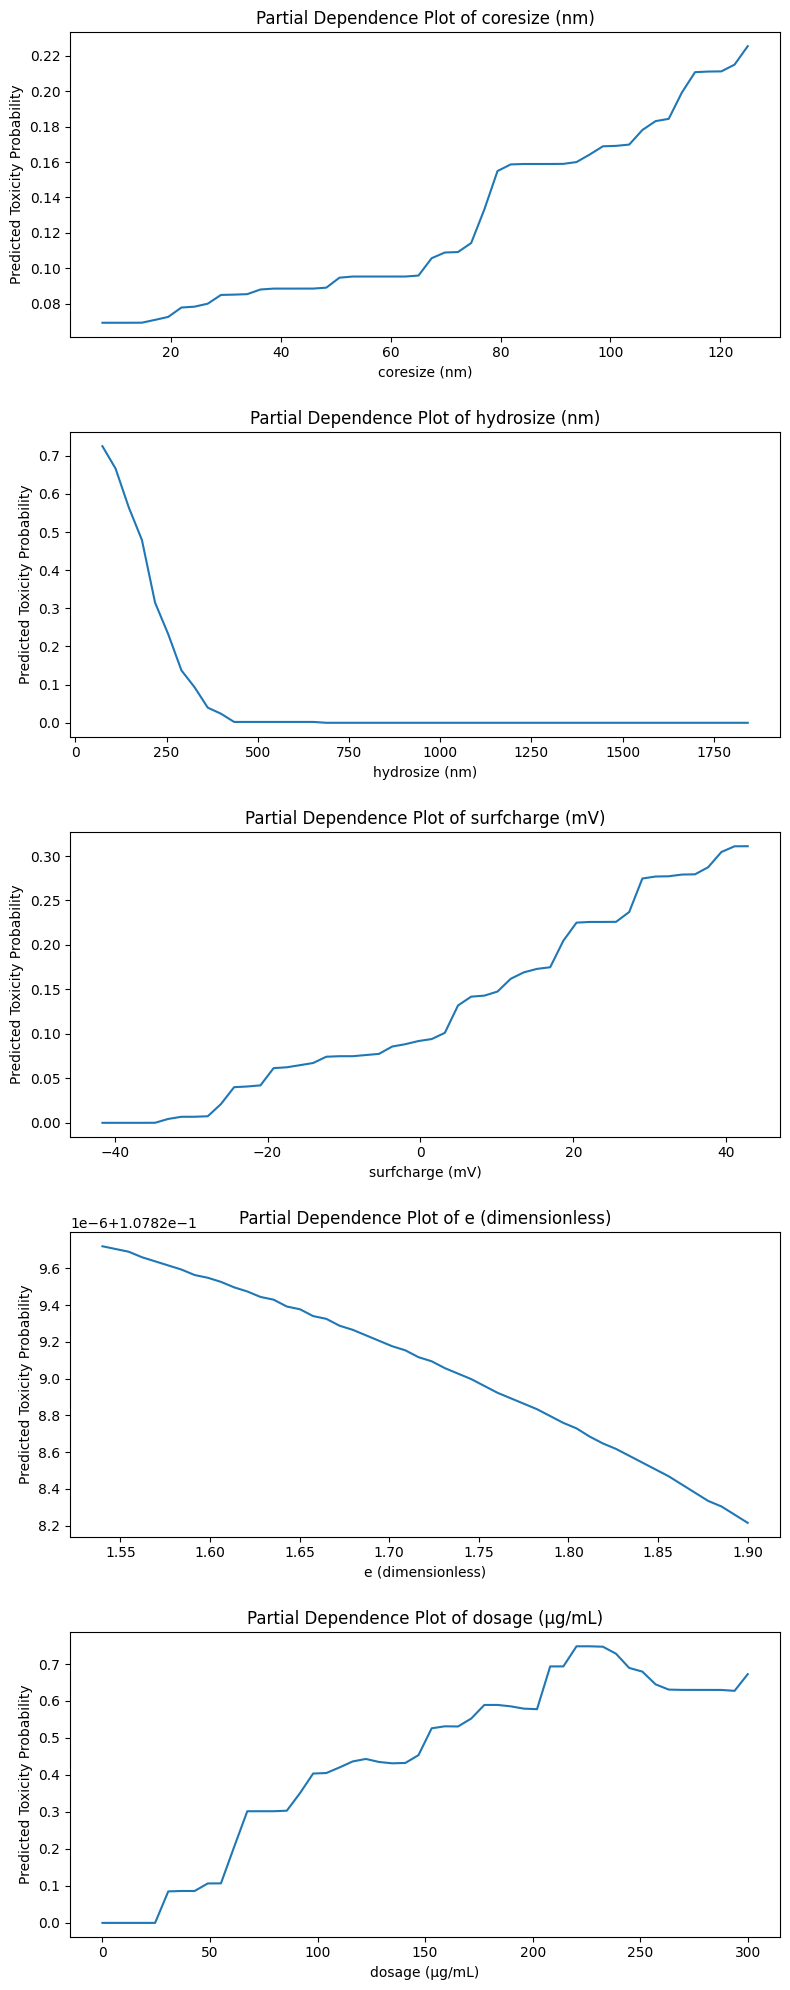

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def partial_dependence_keras(model, X, feature, grid_resolution=50):
    """
    Compute PDP for a single feature for a Keras model.
    Returns grid of feature values and mean predicted probability.
    """

    X_copy = X.copy()

    # Generate range of feature values
    values = np.linspace(X_copy[feature].min(), X_copy[feature].max(), grid_resolution)

    pdp = []

    for v in values:
        X_temp = X_copy.copy()
        X_temp[feature] = v
        preds = model.predict(X_temp, verbose=0)

        # Flatten predictions
        preds = preds.reshape(-1)

        pdp.append(np.mean(preds))

    return values, np.array(pdp)


# -------------------------------------------------------
# Units for features
# -------------------------------------------------------
feature_units = {
    'coresize': 'nm',
    'hydrosize': 'nm',
    'surfcharge': 'mV',
    'surfarea': 'nm²',
    'Ec': 'eV',
    'Expotime': 'hrs',
    'dosage': 'µg/mL',
    'e': 'dimensionless',
    'NOxygen': 'count'
}

# -------------------------------------------------------
# Generate PDP for all features
# -------------------------------------------------------

features = list(X.columns)
n_features = len(features)

plt.figure(figsize=(8, 4 * n_features))

for i, f in enumerate(features):
    # Compute PDP
    xv, yv = partial_dependence_keras(model, X, f)

    # Build label with units
    unit = feature_units.get(f, "")
    label = f"{f} ({unit})" if unit else f

    # Plot
    plt.subplot(n_features, 1, i + 1)
    plt.plot(xv, yv)
    plt.title(f"Partial Dependence Plot of {label}")
    plt.xlabel(label)
    plt.ylabel("Predicted Toxicity Probability")

plt.tight_layout()
plt.show()

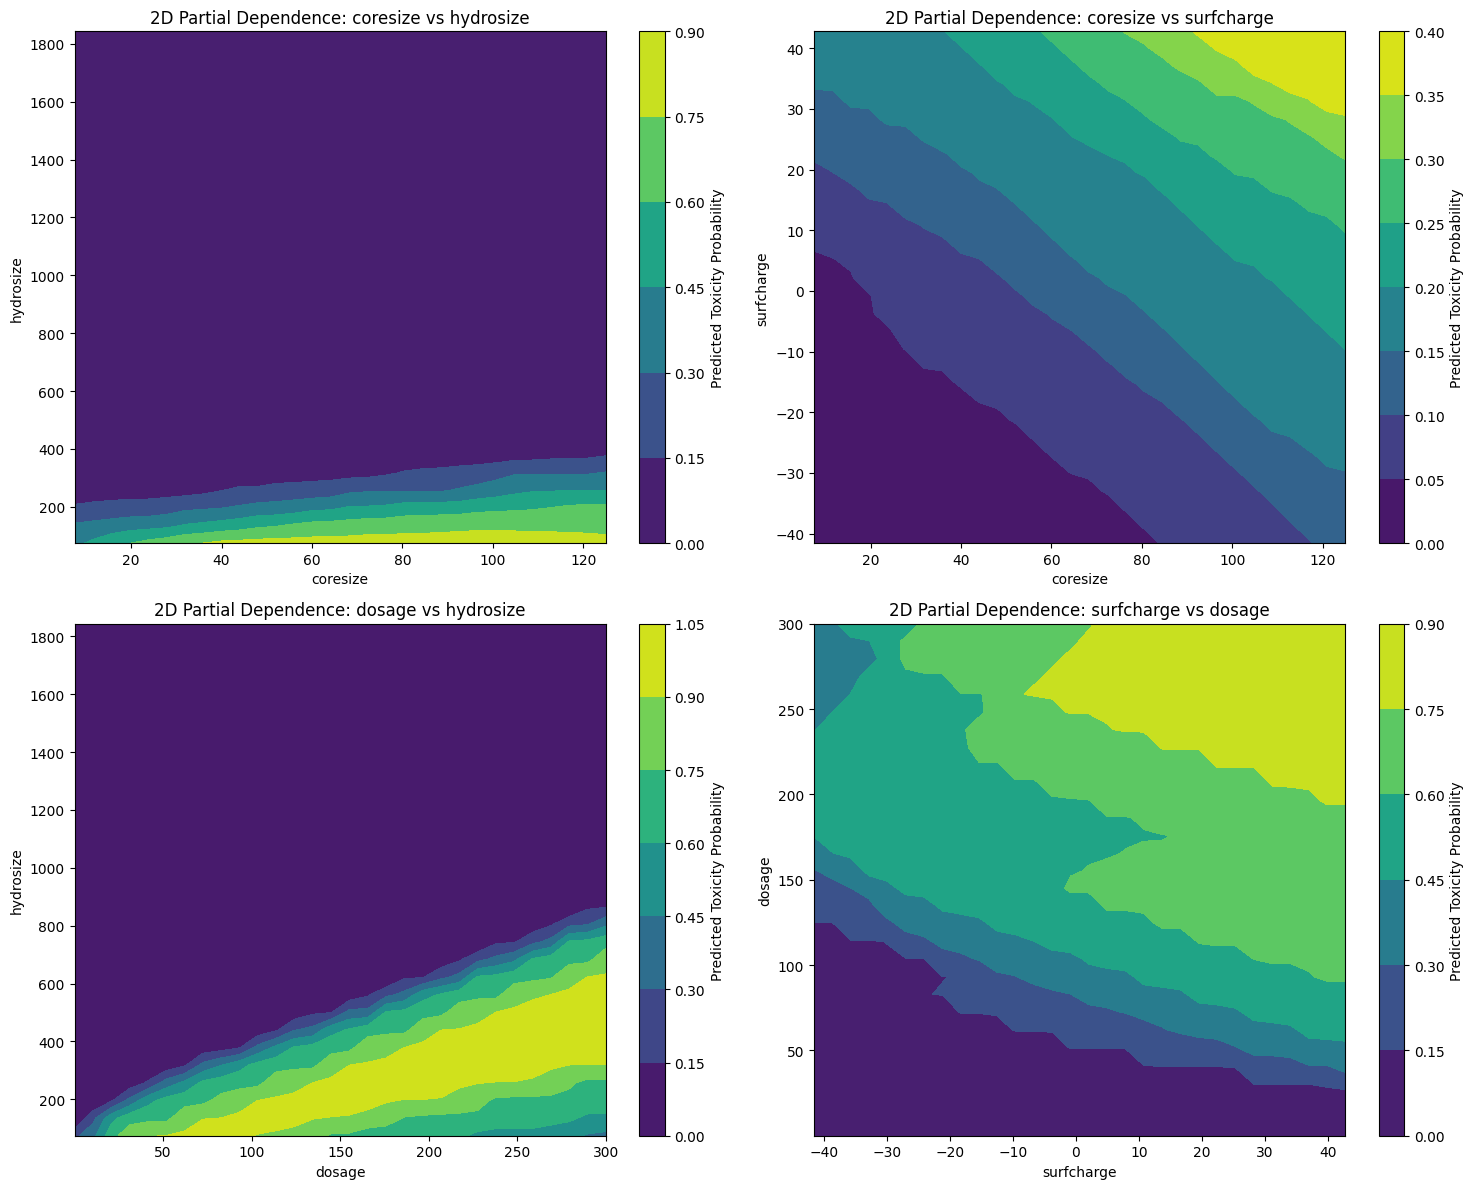

In [ ]:
def partial_dependence_2d_keras(model, X, feature1, feature2, grid_resolution=30):
    """
    Computes 2D partial dependence values for two features for a Keras model.
    Returns:
    - X grid values
    - Y grid values
    - 2D matrix of predicted probabilities
    """

    X_copy = X.copy()

    # Create grid values for both features
    f1_vals = np.linspace(X_copy[feature1].min(), X_copy[feature1].max(), grid_resolution)
    f2_vals = np.linspace(X_copy[feature2].min(), X_copy[feature2].max(), grid_resolution)

    pdp_matrix = np.zeros((grid_resolution, grid_resolution))

    for i, v1 in enumerate(f1_vals):
        for j, v2 in enumerate(f2_vals):
            X_temp = X_copy.copy()
            X_temp[feature1] = v1
            X_temp[feature2] = v2
            preds = model.predict(X_temp, verbose=0)
            preds = preds.reshape(-1)
            pdp_matrix[i, j] = preds.mean()

    return f1_vals, f2_vals, pdp_matrix


# -------------------------------------------------------
# Generate 2D PDPs for selected interactions
# -------------------------------------------------------

pairs = [
    ("coresize", "hydrosize"),
    ("coresize", "surfcharge"),
    ("dosage", "hydrosize"),
    ("surfcharge", "dosage")
]

plt.figure(figsize=(15, 12))

for idx, (f1, f2) in enumerate(pairs):
    f1_values, f2_values, pdp_2d = partial_dependence_2d_keras(
        model, X, f1, f2, grid_resolution=30
    )

    ax = plt.subplot(2, 2, idx+1)
    cs = ax.contourf(f1_values, f2_values, pdp_2d.T, cmap="viridis")
    plt.title(f"2D Partial Dependence: {f1} vs {f2}")
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.colorbar(cs, ax=ax, label="Predicted Toxicity Probability")

plt.tight_layout()
plt.show()

In [ ]:
!pip install shap

  0%|          | 0/200 [00:00<?, ?it/s]

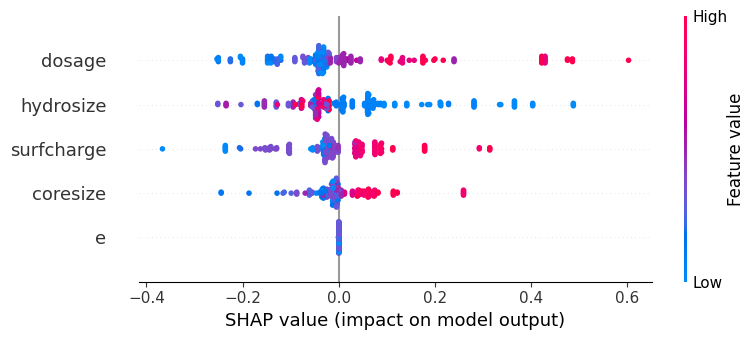

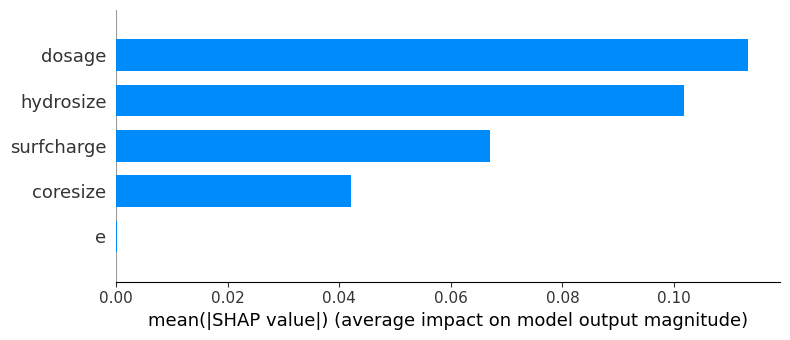

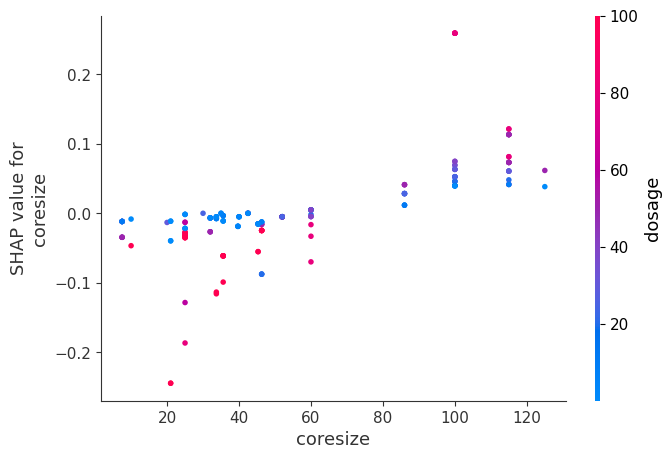

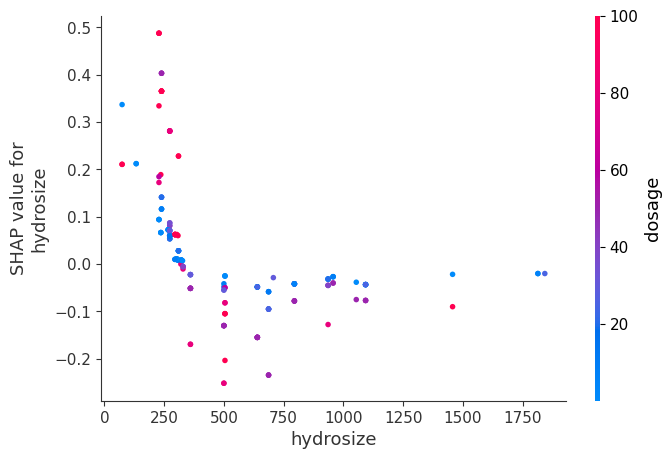

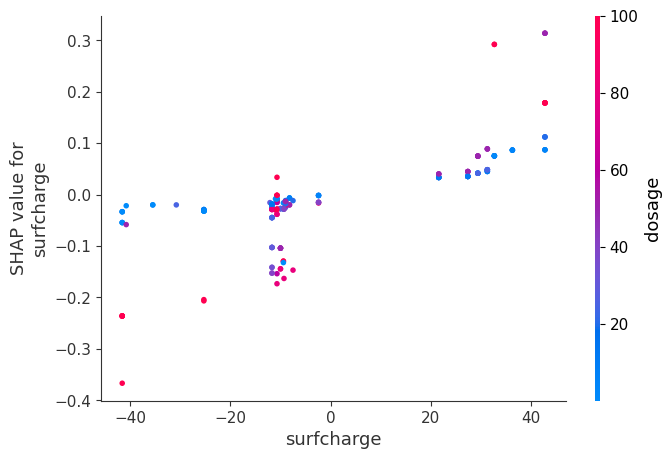

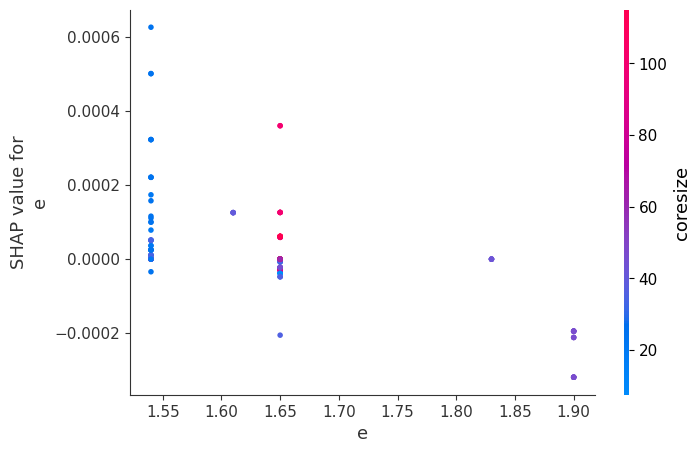

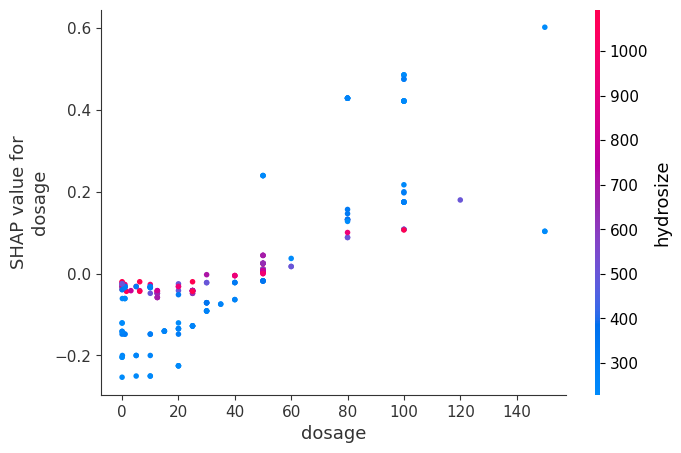

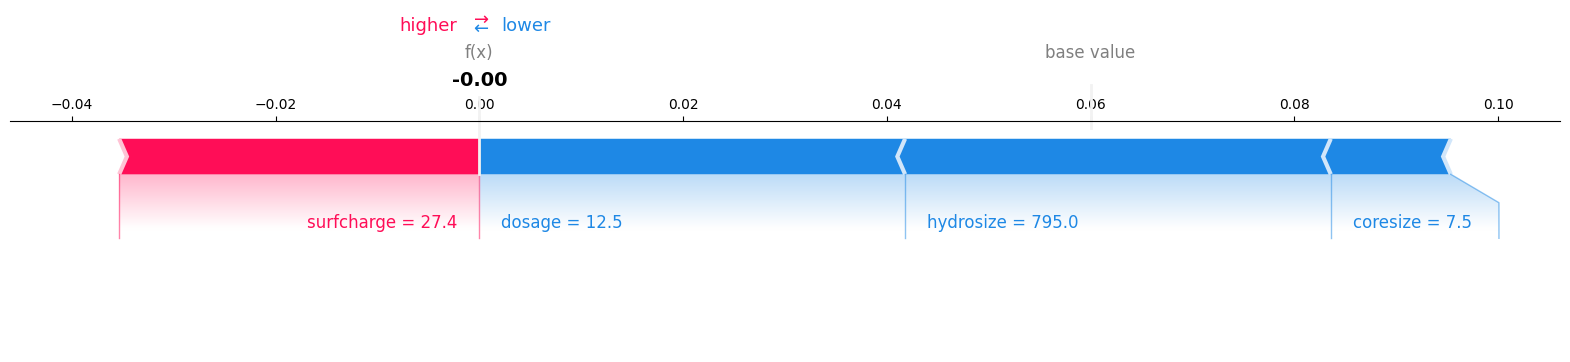

In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Select a small subset as background (20–100 samples)
background = X.sample(50, random_state=42)

# Define a prediction function that returns probability (flattened)
def predict_fn(data):
    preds = model.predict(data, verbose=0)
    return preds.reshape(-1)

explainer = shap.KernelExplainer(predict_fn, background)

# Use a sample from full dataset to compute shap values
X_sample = X.sample(200, random_state=123)

shap_values = explainer.shap_values(X_sample, nsamples=200)

shap.summary_plot(shap_values, X_sample)

shap.summary_plot(shap_values, X_sample, plot_type="bar")

for feature in X.columns:
    shap.dependence_plot(feature, shap_values, X_sample)

# Select a specific row
i = 5  # for example
shap.force_plot(explainer.expected_value, shap_values[i], X_sample.iloc[i], matplotlib=True)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_sample.iloc[0])